# p.162 연습
감독자의 체질검사 데이터를 활용하여 체질 비만도를 예측하기 위한 그래디언트 부스팅 분석을 실시하고 결과를 해석하시오.
* 목표변수 : FAT(연속형)
* 데이터 비율 train : test = 0.7 : 0.3
* random_state = 1234

# Step 0. 패키지 불러오기

### 나무 시각화 패키지 설치

In [1]:
# !pip install graphviz

### 경로 설정

In [2]:
# os 환경
import os
import sys

# PATH 설정
os.environ['PATH'] += os.pathsep + 'C:/Program Files (x86)/Graphviz/bin/'

### 패키지 불러오기

In [3]:
# 데이터 구성
import pandas as pd
import numpy as np
# 데이터 시각화
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
# 한글, 음수 표시
matplotlib.rc('font', family = 'Malgun Gothic')
matplotlib.rc('axes', unicode_minus = False)
# 나무 구조 시각화
import pydot
import graphviz
from sklearn import tree
from graphviz import Source
# 나무 구조 생성 및 저장
from sklearn.tree import export_graphviz
# 데이터 분리
from sklearn.model_selection import train_test_split
# GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor as GBR
# GridSearchCV
from sklearn.model_selection import GridSearchCV
# 경고 메시지
import warnings
warnings.filterwarnings('ignore')

# Step 1. 데이터 구성하기

### 데이터 불러오기

In [4]:
df_raw = pd.read_csv('D:/Study/posco/2_bigdata/raw_data/체질검사.csv')
df_raw.head(3)

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8


### 데이터 분리

In [5]:
# 목표변수, 설명변수 데이터 지정
df_raw_y = df_raw['FAT']
df_raw_x = df_raw.drop('FAT', axis = 1, inplace = False)
# train/test x/y 데이터 분리
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size = 0.3, random_state = 1234)
print('train data X size :', df_train_x.shape)
print('train data Y size :', df_train_y.shape)
print('test data X size :', df_test_x.shape)
print('test data Y size :', df_test_y.shape)

train data X size : (176, 13)
train data Y size : (176,)
test data X size : (76, 13)
test data Y size : (76,)


# Step 3. 그래디언트 부스팅 모델 생성

### 기본 옵션으로 모델 생성

In [6]:
# 기본 모델
gbr_basic = GBR(random_state = 1234)
gbr_basic.fit(df_train_x, df_train_y)
# train/test 데이터 설명력
print('Score in train set :', gbr_basic.score(df_train_x, df_train_y).round(4))
print('Score in test set :', gbr_basic.score(df_test_x, df_test_y).round(4))

Score in train set : 0.9806
Score in test set : 0.5812


* train data에 과대적합

### Hyper Parameter

##### n_estimators : 트리 수

In [7]:
# train/test 설명력 저장
train_score = []
test_score = []

# n_estimators
para_n = [n_n * 10 for n_n in range(1,11)]

for v_n_estimators in para_n :
    gbr = GBR(random_state = 1234,
              n_estimators = v_n_estimators)
    gbr.fit(df_train_x, df_train_y)
    train_score.append(gbr.score(df_train_x, df_train_y))
    test_score.append(gbr.score(df_test_x, df_test_y))
    
# 결과 저장
df_score_n = pd.DataFrame()
df_score_n['n_esimators'] = para_n
df_score_n['TrainScore'] = train_score
df_score_n['TestScore'] = test_score

# 모델 설명력 확인
df_score_n.round(4)

,n_esimators,TrainScore,TestScore
0,10,0.7115,0.5124
1,20,0.8502,0.5892
2,30,0.8967,0.6000
3,40,0.9215,0.5991
4,50,0.9416,0.5867
5,60,0.9545,0.5859
6,70,0.9635,0.5869
7,80,0.9702,0.5809
8,90,0.9757,0.5821
9,100,0.9806,0.5812


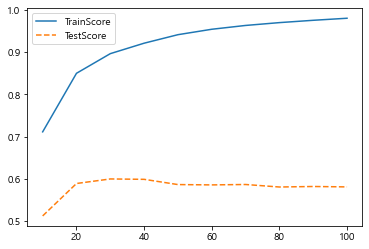

In [8]:
# 모델 설명력 그래프 확인
plt.plot(para_n, train_score, linestyle = '-', label = 'TrainScore')
plt.plot(para_n, test_score, linestyle = '--', label = 'TestScore')
plt.legend();plt.show()

* n_estimators 증가하면 설명력은 증가
* 30, 40 중 하나 선택

##### min_samples_leaf : 잎사귀 노드의 최소 자료 수

In [9]:
# train/test 설명력 저장
train_score = []
test_score = []

# min_samples_leaf
para_leaf = [n_leaf * 1 for n_leaf in range(1,21)]

for v_min_samples_leaf in para_leaf :
    gbr = GBR(random_state = 1234,
              n_estimators = 30,
              min_samples_leaf = v_min_samples_leaf)
    gbr.fit(df_train_x, df_train_y)
    train_score.append(gbr.score(df_train_x, df_train_y))
    test_score.append(gbr.score(df_test_x, df_test_y))
    
# 결과 저장
df_score_leaf = pd.DataFrame()
df_score_leaf['MinSamplesLeaf'] = para_leaf
df_score_leaf['TrainScore'] = train_score
df_score_leaf['TestScore'] = test_score

# 모델 설명력 확인
df_score_leaf.round(4)

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.8967,0.6000
1,2,0.8991,0.5986
2,3,0.8961,0.5939
3,4,0.8927,0.5859
4,5,0.8899,0.6041
5,6,0.8880,0.5957
6,7,0.8839,0.5896
7,8,0.8739,0.6105
8,9,0.8786,0.5978
9,10,0.8727,0.5872


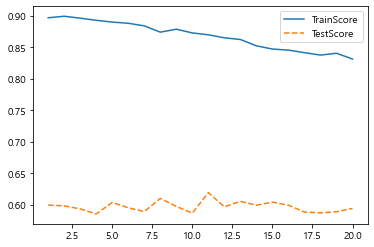

In [10]:
# 모델 설명력 그래프 확인
plt.plot(para_leaf, train_score, linestyle = '-', label = 'TrainScore')
plt.plot(para_leaf, test_score, linestyle = '--', label = 'TestScore')
plt.legend();plt.show()

* min_samples_leaf 증가하면 설명력은 감소
* 8, 11 중 하나 선택

##### min_samples_split : 분리 노드의 최소 자료 수

In [11]:
# train/test 설명력 저장
train_score = []
test_score = []

# min_samples_split
para_split = [n_split * 2 for n_split in range(1,21)]

for v_min_samples_split in para_split :
    gbr = GBR(random_state = 1234,
              n_estimators = 30,
              min_samples_leaf = 11,
              min_samples_split = v_min_samples_split)
    gbr.fit(df_train_x, df_train_y)
    train_score.append(gbr.score(df_train_x, df_train_y))
    test_score.append(gbr.score(df_test_x, df_test_y))
    
# 결과 저장
df_score_split = pd.DataFrame()
df_score_split['MinSamplesLeaf'] = para_split
df_score_split['TrainScore'] = train_score
df_score_split['TestScore'] = test_score

# 모델 설명력 확인
df_score_split.round(4)

,MinSamplesLeaf,TrainScore,TestScore
0,2,0.8697,0.6196
1,4,0.8697,0.6196
2,6,0.8697,0.6196
3,8,0.8697,0.6196
4,10,0.8697,0.6196
5,12,0.8697,0.6196
6,14,0.8697,0.6196
7,16,0.8697,0.6196
8,18,0.8697,0.6196
9,20,0.8697,0.6196


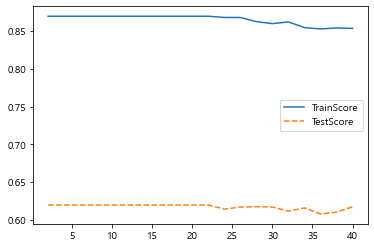

In [12]:
# 모델 설명력 그래프 확인
plt.plot(para_split, train_score, linestyle = '-', label = 'TrainScore')
plt.plot(para_split, test_score, linestyle = '--', label = 'TestScore')
plt.legend();plt.show()

* min_samples_split 증가하면 설명력은 감소
* 22 선택

##### max_depth : 최대 깊이

In [13]:
# train/test 설명력 저장
train_score = []
test_score = []

# max_depth
para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth :
    gbr = GBR(random_state = 1234,
              n_estimators = 30,
              min_samples_leaf = 11,
              min_samples_split = 22,
              max_depth = v_max_depth)
    gbr.fit(df_train_x, df_train_y)
    train_score.append(gbr.score(df_train_x, df_train_y))
    test_score.append(gbr.score(df_test_x, df_test_y))
    
# 결과 저장
df_score_depth = pd.DataFrame()
df_score_depth['MaxDepth'] = para_depth
df_score_depth['TrainScore'] = train_score
df_score_depth['TestScore'] = test_score

# 모델 설명력 확인
df_score_depth.round(4)

,MaxDepth,TrainScore,TestScore
0,1,0.7032,0.5916
1,2,0.8001,0.6001
2,3,0.8697,0.6196
3,4,0.8997,0.6288
4,5,0.9126,0.6127
5,6,0.9170,0.6145
6,7,0.9197,0.6127
7,8,0.9203,0.6147
8,9,0.9211,0.6089
9,10,0.9219,0.6155


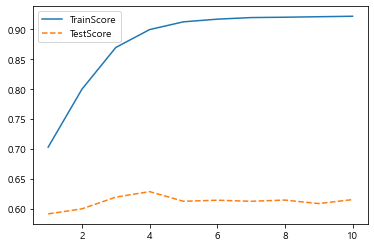

In [14]:
# 모델 설명력 그래프 확인
plt.plot(para_depth, train_score, linestyle = '-', label = 'TrainScore')
plt.plot(para_depth, test_score, linestyle = '--', label = 'TestScore')
plt.legend();plt.show()

* max_depth 증가하면 설명력은 증가
* 4 선택

##### learning_rate : 학습률

In [15]:
# train/test 설명력 저장
train_score = []
test_score = []

# learning_rate
para_lr = [lr * 0.1 for lr in range(1,10)]

for v_learning_rate in para_lr :
    gbr = GBR(random_state = 1234,
              n_estimators = 30,
              min_samples_leaf = 11,
              min_samples_split = 22,
              max_depth = 4,
              learning_rate = v_learning_rate)
    gbr.fit(df_train_x, df_train_y)
    train_score.append(gbr.score(df_train_x, df_train_y))
    test_score.append(gbr.score(df_test_x, df_test_y))
    
# 결과 저장
df_score_lr = pd.DataFrame()
df_score_lr['LearningRate'] = para_lr
df_score_lr['TrainScore'] = train_score
df_score_lr['TestScore'] = test_score

# 모델 설명력 확인
df_score_lr.round(4)

,LearningRate,TrainScore,TestScore
0,0.1,0.8997,0.6288
1,0.2,0.9405,0.5881
2,0.3,0.9665,0.5656
3,0.4,0.9809,0.5389
4,0.5,0.9839,0.5331
5,0.6,0.9899,0.5269
6,0.7,0.9927,0.4782
7,0.8,0.9937,0.4374
8,0.9,0.9967,0.4643


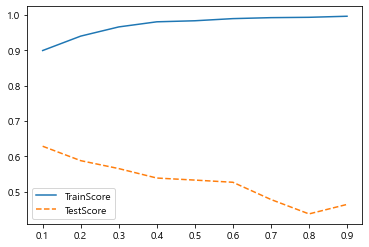

In [16]:
# 모델 설명력 그래프 확인
plt.plot(para_lr, train_score, linestyle = '-', label = 'TrainScore')
plt.plot(para_lr, test_score, linestyle = '--', label = 'TestScore')
plt.legend();plt.show()

* learning_rate 증가하면 설명력은 증가
* 0.1, 0.2 중 하나 선택

##### GridSearchCV

In [17]:
estimator = GBR(random_state = 1234)
# parameter
para_grid = {'criterion' : ['mse','friedman_mse','mae'],
             'max_features' : ['auto','sqrt','log2'],
             'min_samples_leaf' : para_leaf,
             'min_samples_split' : para_split,
             'max_depth' : para_depth,
             'learning_rate' : para_lr}
# 설명력이 높은 최적 parameter 찾기
grid_gbr = GridSearchCV(estimator,
                        para_grid,
                        scoring = 'r2',
                        n_jobs = -1)
grid_gbr.fit(df_train_x, df_train_y)
# 결과 확인
print('best estimator model: \n{}'.format(grid_gbr.best_estimator_))
print('\nbest parameter: \n{}'.format(grid_gbr.best_params_))
print('\nbest score: \n{}'.format(grid_gbr.best_score_.round(4)))

# Step 3. 최종 모델 생성

### 최종 모델 생성

In [18]:
# 최종 모델
gbr_final = GBR(random_state = 1234,
                n_estimators = 30,
                min_samples_leaf = 11,
                min_samples_split = 22,
                max_depth = 4,
                learning_rate = 0.1)
gbr_final.fit(df_train_x, df_train_y)
# train/test 데이터 설명력
print('Score in train set :', gbr_final.score(df_train_x, df_train_y).round(4))
print('Score in test set :', gbr_final.score(df_test_x, df_test_y).round(4))

Score in train set : 0.8997
Score in test set : 0.6288


# Step 4. 결론 도출

### 설명변수 중요도

In [19]:
# 변수명 저장
v_feature_name = df_train_x.columns
# 설명변수 중요도 확인 및 테이블 형태 저장
df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = gbr_final.feature_importances_
# 중요도별 정렬
df_importance.sort_values('Importance', ascending = False, inplace = True)
df_importance.round(3)

,Feature,Importance
5,ABDOMEN,0.775
2,HEIGHT,0.038
12,WRIST,0.025
3,NECK,0.023
6,HIP,0.021
4,CHEST,0.021
0,AGE,0.021
7,THIGH,0.020
8,KNEE,0.017
10,BICEPS,0.014


### 설명변수 중요도 그래프

Text(0, 0.5, '변수')

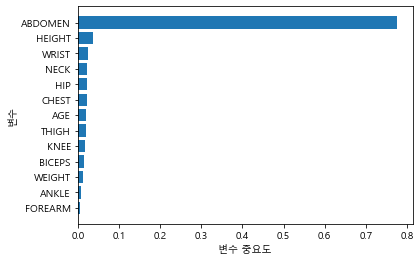

In [20]:
df_importance.sort_values('Importance', ascending = True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('변수 중요도')
plt.ylabel('변수')

* ABDOMEN, HEIGHT, WRIST 순으로 영향이 크다고 볼 수 있다.